In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from ast import literal_eval

In [2]:
controller_output = Path('output')

In [3]:
low_df = pd.read_csv(controller_output / '100_runs_lowest.csv')
high_df = pd.read_csv(controller_output / '100_runs_highest.csv')
random_df = pd.read_csv(controller_output / '100_runs_random.csv')

In [4]:
for df in [low_df, high_df, random_df]:
    df.loc[~df['predicted_optimal_utility'].isna(), 'rule_costs'] = df.loc[~df['predicted_optimal_utility'].isna(), 'rule_costs'].apply(literal_eval)

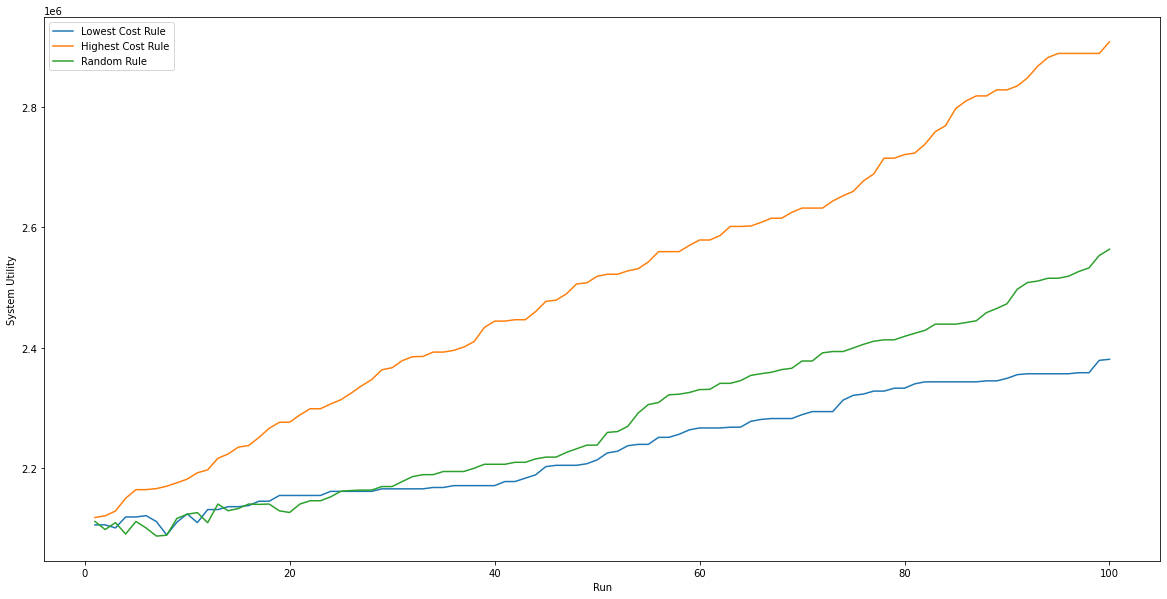

In [5]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='run', y='system_utility', data=low_df, ax=ax, ci=None, label='Lowest Cost Rule')
sns.lineplot(x='run', y='system_utility', data=high_df, ax=ax, ci=None, label='Highest Cost Rule')
sns.lineplot(x='run', y='system_utility', data=random_df, ax=ax, ci=None, label='Random Rule')
ax.set(xlabel='Run', ylabel='System Utility');

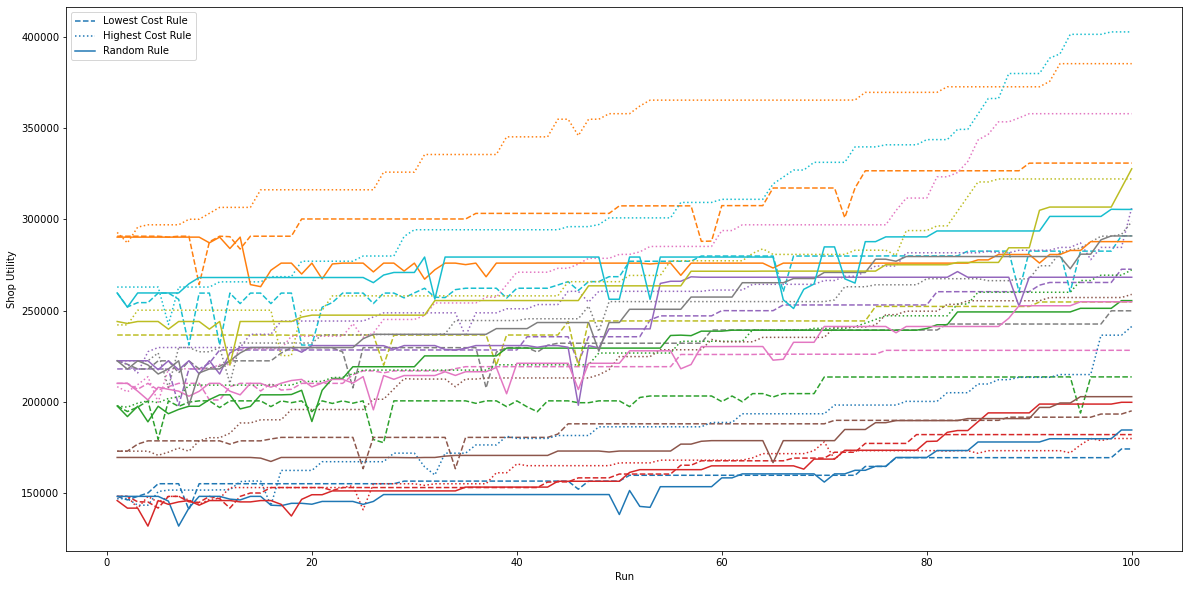

In [6]:
fig, ax = plt.subplots(figsize=(20,10))
lowest = sns.lineplot(x='run', y='shop_utility', hue='shop', data=low_df, ci=None, linestyle='dashed', ax=ax, label='Lowest Cost Rule', legend=False)
highest = sns.lineplot(x='run', y='shop_utility', hue='shop', data=high_df, ci=None, linestyle='dotted', ax=ax, label='Highest Cost Rule', legend=False)
random = sns.lineplot(x='run', y='shop_utility', hue='shop', data=random_df, ci=None, ax=ax, label='Random Rule', legend=False)
ax.set(xlabel='Run', ylabel='Shop Utility');
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::10], ['Lowest Cost Rule', 'Highest Cost Rule', 'Random Rule']);

In [164]:
low_df['combined_index'] = 'after fixing ' + low_df['failure_name'].astype(str) + ' (' + low_df['shop'].astype(str) + ')'

In [165]:
low_df

,run,fix_status,shop,component,component_utility,required_interface,request,replica,perf_max,importance,...,adt,shop_utility,uid,connectivity,provided_interface,rule_names,failure_name,rule_costs,predicted_optimal_utility,combined_index
0,1,before,mRUBiS #1,Availability Item Filter,9668.946968,1,89.0,6.0,16.805051,12.0,...,1.076220,148322.154518,_b_K1WuSREeumKfox9_84gw,2.0,1,NaN,NaN,NaN,NaN,after fixing nan (mRUBiS #1)
1,1,before,mRUBiS #1,Bid and Buy Service,12881.268890,5,360.0,14.0,17.056133,12.0,...,1.316753,148322.154518,_b_K1MuSREeumKfox9_84gw,7.0,2,NaN,NaN,NaN,NaN,after fixing nan (mRUBiS #1)
2,1,before,mRUBiS #1,Seller Reputation Item Filter,8735.816557,1,314.0,10.0,15.184877,12.0,...,1.067252,148322.154518,_b_K1ZOSREeumKfox9_84gw,2.0,1,NaN,NaN,NaN,NaN,after fixing nan (mRUBiS #1)
3,1,before,mRUBiS #1,User Management Service,3945.245093,4,108.0,6.0,6.593309,12.0,...,1.074025,148322.154518,_b_JnAOSREeumKfox9_84gw,8.0,4,NaN,NaN,NaN,NaN,after fixing nan (mRUBiS #1)
4,1,before,mRUBiS #1,Reputation Service,3043.073771,4,357.0,14.0,7.834721,12.0,...,1.246731,148322.154518,_b_K1PuSREeumKfox9_84gw,5.0,1,NaN,NaN,NaN,NaN,after fixing nan (mRUBiS #1)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,100,after,mRUBiS #10,Inventory Service,9092.534693,2,468.0,28.0,11.117148,21.0,...,1.240965,317134.635091,_e3Rm8PBTEeutadcj4Is6qA,3.0,1,NaN,NaN,NaN,NaN,after fixing nan (mRUBiS #10)
35996,100,after,mRUBiS #10,Region Item Filter,22384.812006,1,492.0,29.0,18.388965,21.0,...,1.294757,317134.635091,_e-dNAPBTEeutadcj4Is6qA,2.0,1,NaN,NaN,NaN,NaN,after fixing nan (mRUBiS #10)
35997,100,after,mRUBiS #10,Category Item Filter,10560.667697,1,485.0,13.0,16.836799,21.0,...,1.066150,317134.635091,_fJUZMPBTEeutadcj4Is6qA,2.0,1,NaN,NaN,NaN,NaN,after fixing nan (mRUBiS #10)
35998,100,after,mRUBiS #10,Last Second Sales Item Filter,11475.258714,1,334.0,22.0,19.541519,21.0,...,1.369359,317134.635091,_b_PuwOSREeumKfox9_84gw,2.0,1,NaN,NaN,NaN,NaN,after fixing nan (mRUBiS #10)


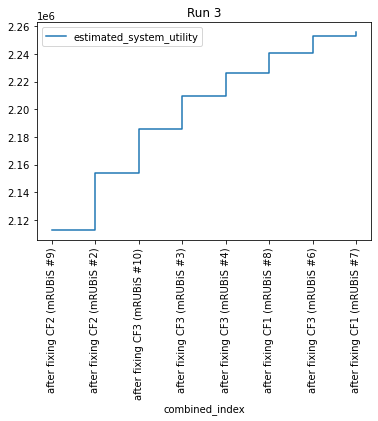

In [171]:
run_to_show = 3
example = low_df.query('run == @run_to_show')
number_of_faults = example['predicted_optimal_utility'].notna().sum()
example_fixes = low_df.query('run == @run_to_show')\
      .sort_values(['fix_status', 'predicted_optimal_utility'], ascending=False)\
      .loc[(low_df['combined_index'].str.contains('CF')) | (low_df['fix_status'] == 'after')]\
      .iloc[:number_of_faults, :]
      #.iloc[:number_of_faults+1,:]
#example_fixes.iloc[-1, example_fixes.columns.get_loc('combined_index')] = 'after re-query'
example_fixes['estimated_system_utility'] = example_fixes['system_utility'] + example_fixes['predicted_optimal_utility'].fillna(0).cumsum()
example_fixes.plot(x='combined_index', y='estimated_system_utility', drawstyle='steps-post', rot=90, title=f'Run {run_to_show}');